In [33]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
from matplotlib.legend_handler import HandlerLine2D
#import ray 


from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, precision_recall_curve, precision_recall_fscore_support
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
from xgboost import XGBClassifier

#pd.set_option('display.max_rows', None)  # None means show all rows
#pd.set_option('display.max_columns', None)  # None means show all columns
#pd.set_option('display.width', 1000)  # Set the width of the display for wrapping
#pd.set_option('display.max_colwidth', None)  # Display full content of each column



# py -m pip install matplotlib


In [34]:
df_private = pd.read_csv('df_private_dummies.txt', sep="\t")

In [35]:
X = df_private.drop(columns=['Churn']) 
y = df_private['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_ht, X_test_ht, y_train_ht, y_test_ht = train_test_split(X_train, y_train, stratify=y_train, test_size=0.8, random_state=42)

In [36]:
df_sm = pd.read_csv('train_data_sm.txt', sep='\t')


mode_value = df_sm['Renewal'].mode()[0]  
df_sm['Renewal'].fillna(mode_value, inplace=True)

X_train_sm = df_sm.drop('Churn', axis=1)  
y_train_sm = df_sm['Churn'] 

X_train_sm_ht, X_test_sm_ht, y_train_sm_ht, y_test_sm_ht = train_test_split(X_train_sm, y_train_sm, stratify=y_train_sm, test_size=0.6, random_state=42)

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_11704\2477837855.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sm['Renewal'].fillna(mode_value, inplace=True)


In [37]:
df_smt = pd.read_csv('train_data_smt.txt', sep='\t')


mode_value = df_smt['Renewal'].mode()[0]  
df_smt['Renewal'].fillna(mode_value, inplace=True)

X_train_smt = df_smt.drop('Churn', axis=1)  
y_train_smt = df_smt['Churn']              

X_train_smt_ht, X_test_smt_ht, y_train_smt_ht, y_test_smt_ht = train_test_split(X_train_smt, y_train_smt, stratify=y_train_smt, test_size=0.6, random_state=42)

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_11704\2866405318.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_smt['Renewal'].fillna(mode_value, inplace=True)


In [38]:
df_enn = pd.read_csv('train_data_enn.txt', sep='\t')


mode_value = df_enn['Renewal'].mode()[0]  
df_enn['Renewal'].fillna(mode_value, inplace=True)

X_train_enn = df_enn.drop('Churn', axis=1)  
y_train_enn = df_enn['Churn']              

X_train_enn_ht, X_test_enn_ht, y_train_enn_ht, y_test_enn_ht = train_test_split(X_train_enn, y_train_enn, stratify=y_train_enn, test_size=0.6, random_state=42)

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_11704\4079823313.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_enn['Renewal'].fillna(mode_value, inplace=True)


In [39]:
f1_scorer = make_scorer(f1_score, greater_is_better = True)

In [40]:
# Geriausias RF modelis

In [ ]:

best_model_rf = RandomForestClassifier(
    bootstrap=False,
    criterion='gini',
    max_depth=40,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=15,
    n_estimators=100,
    random_state=42
)

best_model_rf.fit(X_train_smt, y_train_smt)

y_pred_rf = best_model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

f1_rf = f1_score(y_test, y_pred_rf)
print("F1:", f1_rf)

y_prob_rf = best_model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_score_rf = auc(fpr_rf, tpr_rf)
print("AUC:", auc_score_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

# Accuracy: 0.9735405422172592
# F1: 0.7712523464735854
# AUC: 0.9446938118832047


In [60]:
feat_importances = pd.Series(best_model_rf.feature_importances_, index=X_train.columns)

city_columns = [col for col in X_train.columns if 'City' in col]
city_distributions = X_train[city_columns].mean() 

weighted_importances_city = feat_importances[city_columns] * city_distributions

average_importance_city = weighted_importances_city.sum()         

print("Combined Feature Importance for 'City':", average_importance_city)

Combined Feature Importance for 'City': 0.007850712493352275


In [61]:
feat_importances = pd.Series(best_model_rf.feature_importances_, index=X_train.columns)

type_columns = [col for col in X_train.columns if 'vehicle_type' in col]
type_distributions = X_train[type_columns].mean() 

weighted_importances_type = feat_importances[type_columns] * type_distributions

average_importance_type = weighted_importances_type.sum()

print("Combined Feature Importance for 'type':", average_importance_type)

Combined Feature Importance for 'type': 0.006456357339809123


In [62]:
feat_importances = pd.Series(best_model_rf.feature_importances_, index=X_train.columns)

Duration_columns = [col for col in X_train.columns if 'Duration' in col]
Duration_distributions = X_train[Duration_columns].mean() 

weighted_importances_Duration = feat_importances[Duration_columns] * Duration_distributions

average_importance_Duration = weighted_importances_Duration.sum()

print("Combined Feature Importance for 'type':", average_importance_Duration)

Combined Feature Importance for 'type': 0.11690206900909401


In [63]:
feat_importances = pd.Series(best_model_rf.feature_importances_, index=X_train.columns)

PRODUCT_columns = [col for col in X_train.columns if 'PRODUCT' in col]
PRODUCT_distributions = X_train[PRODUCT_columns].mean() 

weighted_importances_PRODUCT = feat_importances[PRODUCT_columns] * PRODUCT_distributions

average_importance_PRODUCT = weighted_importances_PRODUCT.sum()

print("Combined Feature Importance for 'type':", average_importance_PRODUCT)

Combined Feature Importance for 'type': 0.008673740379531596


In [64]:
feat_importances = pd.Series(best_model_rf.feature_importances_, index=X_train.columns)

Make_columns = [col for col in X_train.columns if 'Make' in col]
Make_distributions = X_train[Make_columns].mean() 

weighted_importances_Make = feat_importances[Make_columns] * Make_distributions

average_importance_Make = weighted_importances_Make.sum()

print("Combined Feature Importance for 'type':", average_importance_Make)

Combined Feature Importance for 'type': 0.004854257191672694


In [65]:
feat_importances = pd.Series(best_model_rf.feature_importances_, index=X_train.columns)

Gender_columns = [col for col in X_train.columns if 'Gender' in col]
Gender_distributions = X_train[Gender_columns].mean() 

weighted_importances_Gender = feat_importances[Gender_columns] * Gender_distributions

average_importance_Gender = weighted_importances_Gender.sum()

print("Combined Feature Importance for 'type':", average_importance_Gender)

Combined Feature Importance for 'type': 0.006741391864581752


In [66]:
feat_importances = pd.Series(best_model_rf.feature_importances_, index=X_train.columns)

Channel_columns = [col for col in X_train.columns if 'Channel' in col]
Channel_distributions = X_train[Channel_columns].mean() 

weighted_importances_Channel = feat_importances[Channel_columns] * Channel_distributions

average_importance_Channel = weighted_importances_Channel.sum()

print("Combined Feature Importance for 'type':", average_importance_Channel)

Combined Feature Importance for 'type': 0.00919037486273559


In [67]:
filtered_importances = feat_importances[~feat_importances.index.str.startswith('City_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Duration_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('vehicle_type_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('PRODUCT_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Make_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Gender_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Channel_')]

In [68]:
filtered_importances['average_importance_City'] = average_importance_city
filtered_importances['average_importance_Duration'] = average_importance_Duration
filtered_importances['average_importance_vehicle_type'] = average_importance_type
filtered_importances['average_importance_PRODUCT'] = average_importance_PRODUCT
filtered_importances['average_importance_Make'] = average_importance_Make
filtered_importances['average_importance_Gender'] = average_importance_Gender
filtered_importances['average_importance_Channel'] = average_importance_Channel

<Axes: >

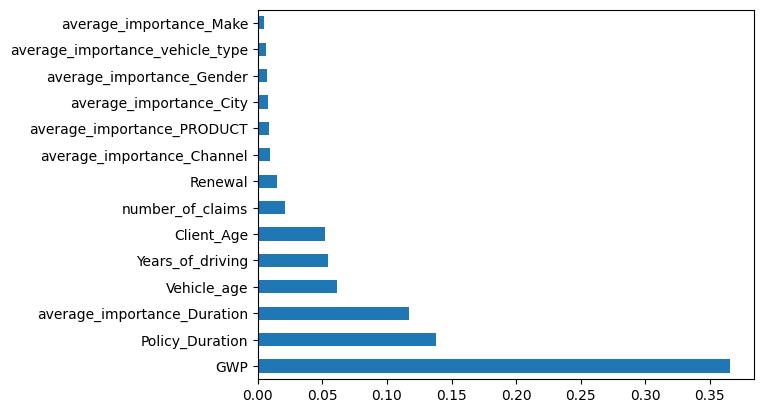

In [70]:
filtered_importances.nlargest(25).plot(kind='barh')

In [59]:
youden_index_rf = tpr_rf - fpr_rf
max_index_rf = youden_index_rf.argmax()
optimal_threshold_rf = thresholds_rf[max_index_rf]
max_youden_index_rf = youden_index_rf[max_index_rf]

print(f"Optimal Threshold: {optimal_threshold_rf}")
print(f"Maximum Youden Index: {max_youden_index_rf}")

Optimal Threshold: 0.29981717092431376
Maximum Youden Index: 0.8310835542975008


In [42]:
# Geriausias DS modelis

In [ ]:

best_model_dt = DecisionTreeClassifier(     
    max_depth=50,
    min_samples_split=20,
    min_samples_leaf=4,
    criterion='entropy'
)

best_model_dt.fit(X_train, y_train)

y_pred_dt = best_model_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

f1_dt = f1_score(y_test, y_pred_dt)
print("F1:", f1_dt)

y_prob_dt = best_model_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
auc_score_dt = auc(fpr_dt, tpr_dt)
print("AUC:", auc_score_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_dt)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

# Accuracy: 0.9697798819478604
# F1: 0.7563816604708798
# AUC: 0.8881849502651066

In [57]:
youden_index_dt = tpr_dt - fpr_dt
max_index_dt = youden_index_dt.argmax()
optimal_threshold_dt = thresholds_dt[max_index_dt]
max_youden_index_dt = youden_index_dt[max_index_dt]

print(f"Optimal Threshold: {optimal_threshold_dt}")
print(f"Maximum Youden Index: {max_youden_index_dt}")

Optimal Threshold: 0.07142857142857142
Maximum Youden Index: 0.8268524745033538


In [44]:
# Geriausias XGBoost modelis

In [ ]:

best_model_xg = XGBClassifier(
    n_estimators=400,      
    learning_rate=0.1,   
    max_depth=10,           
    subsample=0.5,         
    colsample_bytree=1.0,
    use_label_encoder=False,
    enable_categorical=True
)

best_model_xg.fit(X_train_smt, y_train_smt)

y_pred_xg = best_model_xg.predict(X_test)

accuracy_xg = accuracy_score(y_test, y_pred_xg)
print("Accuracy:", accuracy_xg)

f1_xg = f1_score(y_test, y_pred_xg)
print("F1:", f1_xg)

y_prob_xg = best_model_xg.predict_proba(X_test)[:, 1]
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, y_prob_xg)
auc_score_xg = auc(fpr_xg, tpr_xg)
print("AUC:", auc_score_xg)



plt.figure(figsize=(8, 6))
plt.plot(fpr_xg, tpr_xg, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_xg)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

In [56]:
youden_index_xg = tpr_xg - fpr_xg
max_index_xg = youden_index_xg.argmax()
optimal_threshold_xg = thresholds_xg[max_index_xg]
max_youden_index_xg = youden_index_xg[max_index_xg]

print(f"Optimal Threshold: {optimal_threshold_xg}")
print(f"Maximum Youden Index: {max_youden_index_xg}")

Optimal Threshold: 0.11812398582696915
Maximum Youden Index: 0.8499052127180807


In [46]:
# Geriausias KNN modelis

In [47]:


important_features = [
    'GWP', 'PRODUCT_MOD', 'PRODUCT_MTPL', 'Duration_Long', 'Duration_Short',
       'Make_ALFA ROMEO', 'Make_APRILIA', 'Make_CHEVROLET',
       'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_JAGUAR',
       'Make_JEEP', 'Make_KAWASAKI', 'Make_KIA', 'Make_KTM', 'Make_LANCIA',
       'Make_LAND ROVER', 'Make_MINI', 'Make_NISSAN', 'Make_Other',
       'Make_ROVER', 'Make_SAAB', 'Make_SUZUKI', 'Make_YAMAHA',
       'vehicle_type_group_mapped_2) Truck over 3,5T',
       'vehicle_type_group_mapped_3) Delivery van',
       'vehicle_type_group_mapped_4) Full trailer',
       'vehicle_type_group_mapped_5) Motorcycle',
       'vehicle_type_group_mapped_6) Personal',
       'vehicle_type_group_mapped_7) Trailer',
       'vehicle_type_group_mapped_8) Tractor', 'City_Alytaus rajonas',
       'City_Jonava', 'City_Kauno rajonas', 'City_Marijampolės rajonas',
       'City_Panevėžio rajonas', 'City_Telšiai', 'City_Unknown',
       'City_Šiaulių rajonas', 'Channel_Affinity',
       'Channel_Direct Corporate Sales',
       'Churn'

]

important_features = [feature for feature in important_features if feature in df_private.columns]

df_filtered = df_private[important_features]

X_filtered = df_filtered.drop(columns=['Churn']) 
y_filtered = df_filtered['Churn']

X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, stratify=y_filtered, test_size=0.3, random_state=42)

In [48]:
knn = KNeighborsClassifier(n_neighbors=2, p=2, weights='distance')

knn.fit(X_train_filtered, y_train_filtered)

y_pred = knn.predict(X_test_filtered)

f1 = f1_score(y_test, y_pred)  # 'weighted' handles multi-class scenarios
print(f"F1 Score: {f1}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

F1 Score: 0.8904263877715205


In [55]:
youden_index = tpr - fpr
max_index = youden_index.argmax()
optimal_threshold = thresholds[max_index]
max_youden_index = youden_index[max_index]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Maximum Youden Index: {max_youden_index}")

Optimal Threshold: 1.0
Maximum Youden Index: 0.842497299123073


In [49]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# auc_score = auc(fpr, tpr)
# fpr_filtered, tpr_filtered, thresholds_filtered = roc_curve(y_test_filtered, y_pred)
# auc_score_filtered = auc(fpr_filtered, tpr_filtered)
# #
# fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
# auc_score_rf = auc(fpr_rf, tpr_rf)
# fpr_rf_filtered, tpr_rf_filtered, thresholds_rf_filtered = roc_curve(y_test_filtered, y_pred_rf)
# auc_score_rf_filtered = auc(fpr_rf_filtered, tpr_rf_filtered)
# #
# fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
# auc_score_dt = auc(fpr_dt, tpr_dt)
# fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
# auc_score_dt = auc(fpr_dt, tpr_dt)
# #
# fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, y_pred_xg)
# auc_score_xg = auc(fpr_xg, tpr_xg)
# fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, y_pred_xg)
# auc_score_xg = auc(fpr_xg, tpr_xg)

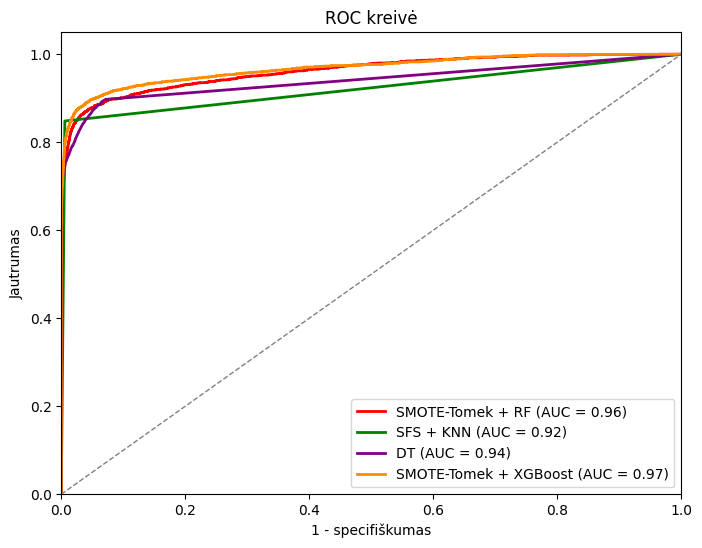

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='SMOTE-Tomek + RF (AUC = %0.2f)' % auc_score_rf)
plt.plot(fpr, tpr, color='green', lw=2, label='SFS + KNN (AUC = %0.2f)' % auc_score)
plt.plot(fpr_dt, tpr_dt, color='purple', lw=2, label='DT (AUC = %0.2f)' % auc_score_dt)
plt.plot(fpr_xg, tpr_xg, color='darkorange', lw=2, label='SMOTE-Tomek + XGBoost (AUC = %0.2f)' % auc_score_xg)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specifiškumas')
plt.ylabel('Jautrumas')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='RF (AUC = %0.2f)' % auc_score_rf)
plt.plot(fpr, tpr, color='green', lw=2, label='SFS + KNN (AUC = %0.2f)' % auc_score)
plt.plot(fpr_dt, tpr_dt, color='purple', lw=2, label='DT (AUC = %0.2f)' % auc_score_dt)
plt.plot(fpr_xg, tpr_xg, color='darkorange', lw=2, label='SMOTE-Tomek + XGBoost (AUC = %0.2f)' % auc_score_xg)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specifiškumas')
plt.ylabel('Jautrumas')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()